In [10]:
import pandas as pd

file_path = "/Users/ludovica/Documents/Bachelor/BA6/Physical Chemistry/Challenge A/Fluo/2 method.xlsx"
sheet_name = "normalised "

df = pd.read_excel(file_path, sheet_name=sheet_name)

# Define the target wavelength
target_wavelength = 285

# Identify the wavelength column 
wavelength_col = df.columns[0]

# Filter the row corresponding to the target wavelength
selected_row = df[df[wavelength_col] == target_wavelength]

print(selected_row)


    Wavelength (nm)         0         3    6         9        12        15  \
25            285.0  0.995245  0.987145  1.0  0.420198  0.241181  0.157607   

          18        21        24        30        36        42        48  
25  0.179641  0.108418  0.092883  0.061781  0.046545  0.046201  0.041175  


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import os 

In [12]:
# Hill equation definition
def hill_eq(x, n, Ka):
    return (x**n) / (Ka**n + x**n)

x = 6
y = 11
# Given data
ycbien = selected_row.iloc[:, 1:].to_numpy().flatten()  # Remove the first (wavelength) value
ycbien = np.abs(ycbien - 1)
#ycbien_removed = ycbien_prime[np.arange(x, y)].tolist()
#ycbien = np.delete(ycbien_prime, np.arange(x, y))


xd = np.array([
    0,
    4.4932601E-06,
    8.9730808E-06,
    1.3439522E-05,
    1.7892644E-05,
    2.2332506E-05,
    2.6759167E-05,
    3.1172687E-05,
    3.5573123E-05,
    4.4334975E-05,
    5.3045187E-05,
    6.1704212E-05,
    7.0312500E-05
]) 
#xd = np.delete(xd_prime, np.arange(x, y))
#xd_removed = xd_prime[np.arange(x, y)].tolist()

ycbien



array([0.00475523, 0.01285526, 0.        , 0.57980191, 0.75881944,
       0.84239343, 0.82035922, 0.89158218, 0.9071169 , 0.9382191 ,
       0.95345534, 0.95379888, 0.95882477])

/var/folders/h_/r3lv2bc576qbm4jbyp94hfxr0000gn/T/ipykernel_99317/3299279907.py:3: RuntimeWarning: divide by zero encountered in power
  return (x**n) / (Ka**n + x**n)
/var/folders/h_/r3lv2bc576qbm4jbyp94hfxr0000gn/T/ipykernel_99317/3299279907.py:3: RuntimeWarning: overflow encountered in power
  return (x**n) / (Ka**n + x**n)
/var/folders/h_/r3lv2bc576qbm4jbyp94hfxr0000gn/T/ipykernel_99317/3299279907.py:3: RuntimeWarning: invalid value encountered in scalar power
  return (x**n) / (Ka**n + x**n)
/var/folders/h_/r3lv2bc576qbm4jbyp94hfxr0000gn/T/ipykernel_99317/2746064576.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(xd, ycbien, 'bo', color="royalblue", label='Experimental data')
/var/folders/h_/r3lv2bc576qbm4jbyp94hfxr0000gn/T/ipykernel_99317/2746064576.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (->

Plot saved to: /Users/ludovica/Documents/Bachelor/BA6/Physical Chemistry/Challenge A/Fluo/Hill Equation Fit Method 2.png


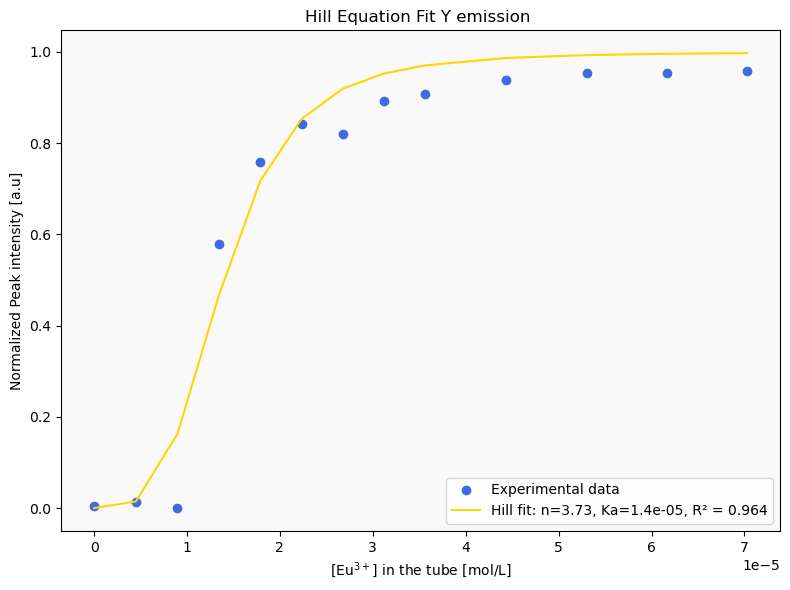

In [13]:
# Fit the data to the Hill equation
popt, pcov = curve_fit(hill_eq, xd, ycbien, p0=[1, 1], maxfev=5000)  # Initial guess for n and Ka
n_opt, Ka_opt = popt  # Optimized parameters

# Generate fitted values
y_fit = hill_eq(xd, *popt)

# Calculate R^2 score
r2 = r2_score(ycbien, y_fit)

# Plotting the original data and fitted curve
plt.figure(figsize=(8, 6))

# Plot: Standard Plot
plt.plot(xd, ycbien, 'bo', color="royalblue", label='Experimental data')
#plt.plot(xd_removed, ycbien_removed, 'bo', color="lightsteelblue", label='Removed data')
plt.plot(xd, y_fit, 'r-', color="gold", label=f'Hill fit: n={n_opt:.2f}, Ka={Ka_opt:.1e}, R² = {r2:.3f}')
plt.xlabel('[Eu$^{3+}$] in the tube [mol/L]')
plt.ylabel('Normalized Peak intensity [a.u]')
plt.legend()
plt.title(f'Hill Equation Fit Y emission ')
plt.gca().set_facecolor('#f9f9f9')

plt.tight_layout()

#function to save the plot 
def save_plot(directory, filename="Hill Equation Fit Method 2.png", format="png"):
    if not os.path.exists(directory):
        os.makedirs(directory)  # Create directory if it doesn't exist
    filepath = os.path.join(directory, filename)
    plt.savefig(filepath, format=format, dpi=600, bbox_inches="tight")
    print(f"Plot saved to: {filepath}")
save_plot("/Users/ludovica/Documents/Bachelor/BA6/Physical Chemistry/Challenge A/Fluo")

plt.show()

